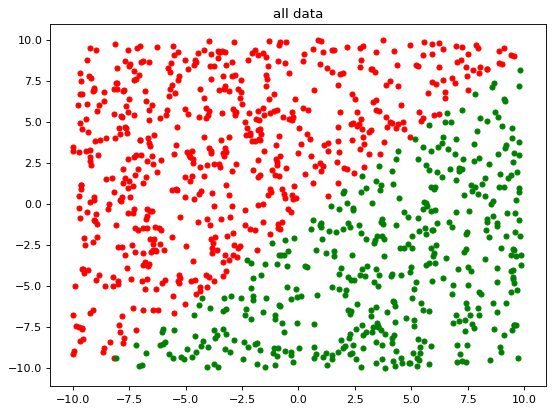

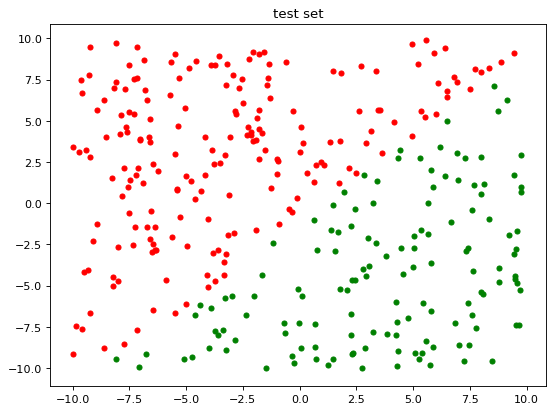

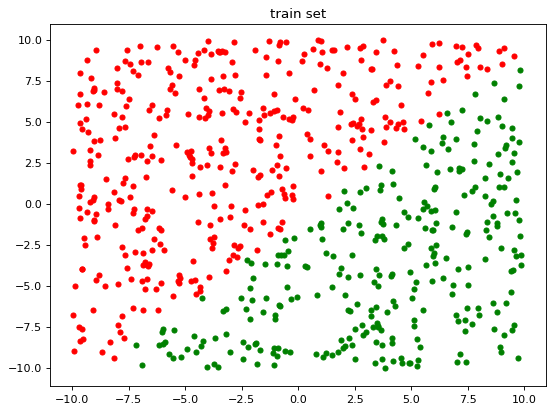

In [2]:
#%%writefile generate_dataset.py

# encoding=utf8
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

N = 10 #生成训练数据的个数

# AX=0 相当于matlab中 null(a','r')
def null(a, rtol=1e-5):
    u, s, v = np.linalg.svd(a)
    rank = (s > rtol*s[0]).sum()
    return rank, v[rank:].T.copy()

# 符号函数，之后要进行向量化
def sign(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    elif x < 0:
        return -1
#noisy=False，那么就会生成N的dim维的线性可分数据X，标签为y
#noisy=True, 那么生成的数据是线性不可分的,标签为y
def mk_data(N, noisy=False):
    rang = [-10,10]
    dim = 2

    X=np.random.rand(dim,N)*(rang[1]-rang[0])+rang[0]

    while True:
        Xsample = np.concatenate((np.ones((1,dim)), np.random.rand(dim,dim)*(rang[1]-rang[0])+rang[0]))
        k,w=null(Xsample.T)
        y = sign(np.dot(w.T,np.concatenate((np.ones((1,N)), X))))
        if np.all(y):
            break

    if noisy == True:
        idx = random.sample(range(1,N), N/10)

        for id in idx:
            y[0][id] = -y[0][id]

    return (X,y,w)

def data_visualization(X,y,title):
    class_1 = [[],[]]
    class_2 = [[],[]]

    size = len(y)

    for i in range(size):
        X_1 = X[0][i]
        X_2 = X[1][i]

        if y[i] == 1:
            class_1[0].append(X_1)
            class_1[1].append(X_2)
        else:
            class_2[0].append(X_1)
            class_2[1].append(X_2)


    plt.figure(figsize=(8, 6), dpi=80)
    plt.title(title)

    axes = plt.subplot(111)

    type1 = axes.scatter(class_1[0], class_1[1], s=20, c='red')
    type2 = axes.scatter(class_2[0], class_2[1], s=20, c='green')


    plt.show()

def rebuild_features(features):
    size = len(features[0])

    new_features = []
    for i in range(size):
        new_features.append([features[0][i],features[1][i]])

    return new_features

def generate_dataset(size, noisy = False, visualization = True):
    global sign
    sign = np.vectorize(sign)
    X,y,w = mk_data(size,False)
    y = list(y[0])

    if visualization:
        data_visualization(X,y,'all data')         #数据可视化

    testset_size = int(len(y)*0.333)

    indexes = [i for i in range(len(y))]
    test_indexes = random.sample(indexes,testset_size)
    train_indexes = list(set(indexes)-set(test_indexes))

    trainset_features = [[],[]]
    trainset_labels = []

    testset_features = [[],[]]
    testset_labels = []

    for i in test_indexes:
        testset_features[0].append(X[0][i])
        testset_features[1].append(X[1][i])
        testset_labels.append(y[i])


    if visualization:
        data_visualization(testset_features,testset_labels,'test set')

    for i in train_indexes:
        trainset_features[0].append(X[0][i])
        trainset_features[1].append(X[1][i])
        trainset_labels.append(y[i])

    if visualization:
        data_visualization(trainset_features,trainset_labels,'train set')

    return rebuild_features(trainset_features),trainset_labels,rebuild_features(testset_features),testset_labels



if __name__ == '__main__':

    size = 1000
    generate_dataset(size)

    # generate_dataset
    # print(sign)
    # sign = np.vectorize(sign)
    # X,y,w = mk_data(size,False)
    #
    # data_visualization(X,y)
# encoding=utf8